In [222]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

import pandas as pd
from sklearn.feature_extraction.image import extract_patches_2d

#### Making Function for Exttracting Patches ( Dense Patches )

In [20]:
def get_dense_patches(img, pl):
    rows, cols, _ = img.shape
    patches = []
    for i in range(0,rows-pl,pl):
        for j in range(0,cols-pl,pl):
            patches.append(img[i:i+pl, j:j+pl, :])
    return patches

###### Checking

In [4]:
img = cv2.imread("class_1_images/1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(img)

In [21]:
patches = get_dense_patches(img, 8)
len(patches)

576

In [22]:
img1 = img.copy()

In [23]:
img1[10:18, 20:28, :] = np.zeros((8,8,3))

In [ ]:
plt.imshow(img1)

In [25]:
k=img[10:18,10:18,:]

In [ ]:
for i in patches[:3]:
    plt.imshow(i)
    plt.show()

In [12]:
patch = extract_patches_2d(img, patch_size=(8, 8), max_patches = 10, random_state=1)

#### Extracting images from folders

In [31]:
class1 = "class_1_images"
c1 = os.listdir(class1)

class2 = "class_2_images"
c2 = os.listdir(class2)

classes = {class1:c1, class2:c2}

#### Extracting Patches

###### Using Dense patches: 196x196 / 8x8

In [44]:
l_patches_dense = {}

pl = 8

for c in classes:
    for i in classes[c]:
        pth = os.path.join(c, i)
        img = cv2.imread(pth)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        l_patches_dense[pth] = patch = get_dense_patches(img, pl)
        print(pth, ":", len(patches))

class_1_images\1.png : 576
class_1_images\2.png : 576
class_1_images\3.png : 576
class_1_images\4.png : 576
class_1_images\5.png : 576
class_2_images\1.png : 576
class_2_images\2.png : 576
class_2_images\3.png : 576
class_2_images\4.png : 576
class_2_images\5.png : 576


###### Using SIFT like algorithm provided by SKLearn

In [124]:
l_patches_sklearn = {}

patch_sz = 8
maximum_patches = 1000

for c in classes:
    for i in classes[c]:
        pth = os.path.join(c, i)
        img = cv2.imread(pth)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        l_patches_sklearn[pth] = patch = extract_patches_2d(img, patch_size=(patch_sz, patch_sz), max_patches = maximum_patches, random_state=1)
        print(pth,":",len(patch))

class_1_images\1.png : 1000
class_1_images\2.png : 1000
class_1_images\3.png : 1000
class_1_images\4.png : 1000
class_1_images\5.png : 1000
class_2_images\1.png : 1000
class_2_images\2.png : 1000
class_2_images\3.png : 1000
class_2_images\4.png : 1000
class_2_images\5.png : 1000


#### Converting to feature Vector

In [126]:
l_vec = []
for i in l_patches_sklearn:
    for patch in l_patches_sklearn[i]:
        l_vec.append(patch.flatten())

In [127]:
v_arr = np.array(l_vec)
v_arr.shape

(10000, 192)

#### Grouping into Clusteers using KMeans clustering 

###### Using Homemade kmeans

In [128]:
import k_means

In [129]:
model = k_means.KMeans(k=10, max_iter=100)
fitting = model.fit(v_arr)

Kmeans clustering fitting:  51%|█████     | 51/100 [01:22<01:19,  1.63s/it]


In [130]:
centers = model.centeroids
centers.shape

(10, 192)

###### Using SKLearn's KMeans

In [131]:
from sklearn.cluster import KMeans

In [142]:
km = KMeans(n_clusters=10, n_init = "auto").fit(v_arr)
cntrs = km.cluster_centers_
cntrs = np.sort(cntrs)
cntrs.shape

In [227]:
lb = km.labels_

In [143]:
cntrs

array([[ 42.13886672,  42.14046289,  42.30486832, ..., 124.264166  ,
        124.30965682, 124.53950519],
       [ 28.62372881,  28.64180791,  28.83502825, ..., 188.03276836,
        188.04745763, 188.46553672],
       [ 39.06525573,  39.23544974,  39.30246914, ..., 110.62257496,
        110.70811287, 111.2707231 ],
       ...,
       [ 28.85159011,  29.63321555,  29.90318021, ...,  86.51872792,
         86.69540636,  86.75759717],
       [ 76.58681672,  77.18649518,  77.18810289, ..., 171.92604502,
        172.29099678, 173.46784566],
       [128.3259325 , 128.43339254, 128.80905861, ..., 202.05683837,
        202.11722913, 202.3259325 ]])

#### Binning Using Cluster Centers

In [144]:
bins = []

for c in classes:
    d = {}
    for i in classes[c]:
        pth = os.path.join(c, i)
        patches = l_patches_sklearn[pth]
        hist = [0 for i in range(10)]
        for patch in patches:
            eds = [k_means.ed(patch.flatten(), cntr) for cntr in cntrs]
            eds = np.array(eds)
            hist[np.argmin(eds)] += 1
        d[pth] = hist
    bins.append(d)     


In [145]:
bins

[{'class_1_images\\1.png': [15, 0, 226, 203, 0, 17, 155, 350, 0, 34],
  'class_1_images\\2.png': [8, 1, 129, 191, 1, 43, 327, 234, 4, 62],
  'class_1_images\\3.png': [1, 0, 18, 59, 0, 204, 482, 108, 0, 128],
  'class_1_images\\4.png': [0, 0, 74, 140, 0, 5, 447, 321, 0, 13],
  'class_1_images\\5.png': [11, 1, 106, 332, 7, 208, 147, 146, 1, 41]},
 {'class_2_images\\1.png': [3, 0, 349, 465, 0, 7, 16, 143, 1, 16],
  'class_2_images\\2.png': [1, 0, 147, 308, 0, 174, 119, 133, 0, 118],
  'class_2_images\\3.png': [11, 0, 153, 485, 0, 40, 36, 98, 11, 166],
  'class_2_images\\4.png': [15, 2, 129, 336, 10, 171, 77, 136, 6, 118],
  'class_2_images\\5.png': [6, 0, 136, 387, 2, 145, 22, 156, 0, 146]}]

#### Plotting Histogram

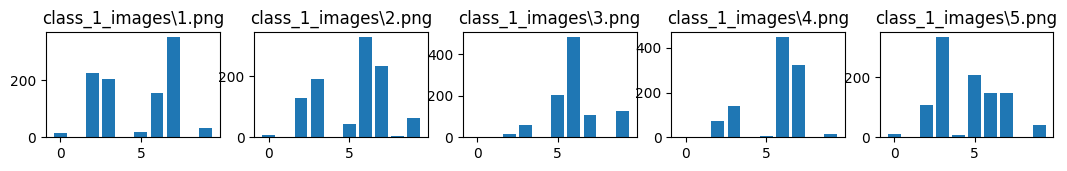

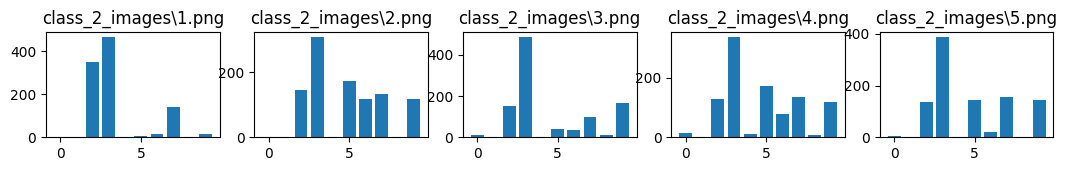

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


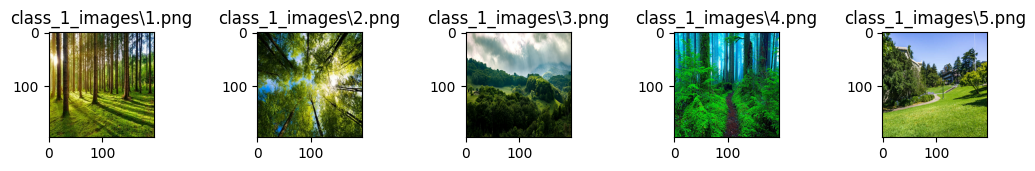

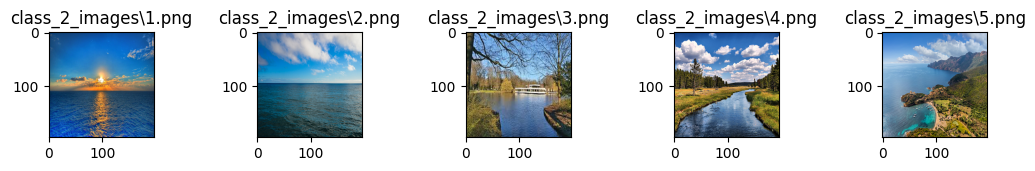

In [265]:
## Plotting Bar Graph
for i in bins:
    plt.figure(figsize=(13, 3))
    j = 1
    for im in i:
        plt.subplot(len(bins), len(i), j)
        plt.bar([i for i in range(10)], i[im])
        plt.title(im)
        j+=1
    plt.show()

print("-"*170)

## Showing images 
for i in bins:
    plt.figure(figsize=(13, 3))
    j = 1
    for im in i:
        plt.subplot(len(bins), len(i), j)
        img = cv2.imread(im)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(im)
        j+=1
    plt.show()

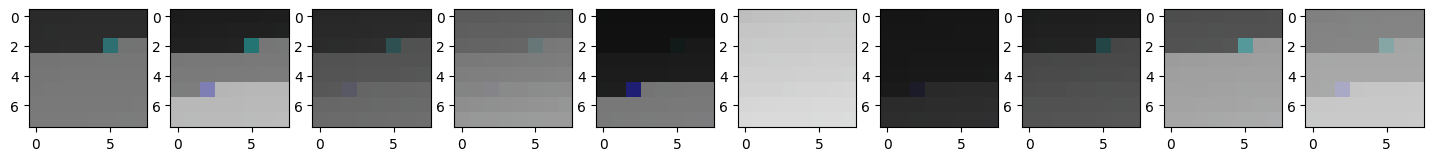

In [220]:
plt.figure(figsize=(18,25))
j = 1
for i in cntrs:
    k = i.reshape(8,8,3)
    plt.subplot(1,10,j)
    j+=1
    plt.imshow(k/255)
plt.show()

In [232]:
from sklearn.manifold import TSNE
import seaborn as sn

In [262]:
model = TSNE(n_components = 2, random_state = 0)
 
tsne_data = model.fit_transform(v_arr)
 
tsne_data = np.vstack((tsne_data.T, lb)).T
tsne_df = pd.DataFrame(data = tsne_data, columns =("Dim_1", "Dim_2", "label"))

<Axes: xlabel='Dim_1', ylabel='Dim_2'>

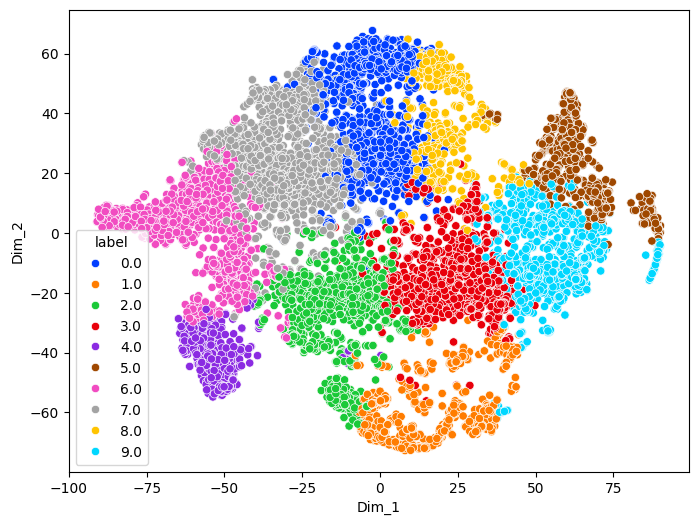

In [263]:
plt.figure(figsize=(8, 6))
sn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',  hue='label', palette="bright")